In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') # to mount the drive data into colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/ML nishit sir/Linear Regression"

/content/drive/My Drive/ML nishit sir/Linear Regression


In [ ]:
#columnname=['x','y']
dataset=pd.read_csv("train.csv")
print(dataset)
dataset.shape

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


(700, 2)

In [ ]:
dataf=pd.DataFrame(dataset)
dataf.describe()#to check the nature of dataset

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
x_value=dataf.iloc[0:700,0:1] #separating x values
print(x_value)

        x
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
..    ...
695  58.0
696  93.0
697  82.0
698  66.0
699  97.0

[700 rows x 1 columns]


In [ ]:
y_value=dataf.iloc[0:700,1:2] #separating y values
print(y_value)


             y
0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
..         ...
695  58.595006
696  94.625094
697  88.603770
698  63.648685
699  94.975266

[700 rows x 1 columns]


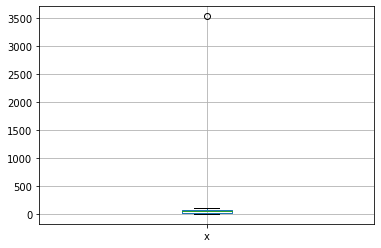

In [ ]:
x_box=x_value.boxplot(column=['x'])

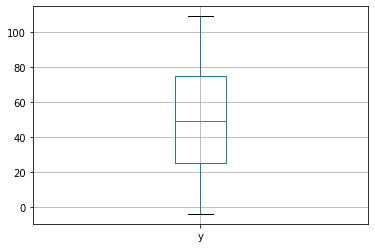

In [ ]:
y_box=y_value.boxplot(column=['y'])

Text(0.5, 1.0, '1st LR scatter plot')

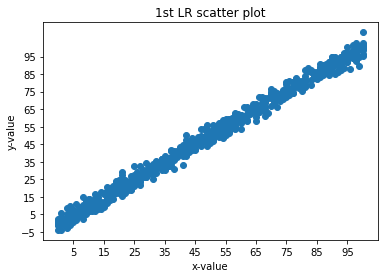

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(5,100,step=10))
plt.yticks(np.arange(-5,100,step=10))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("1st LR scatter plot")

In [ ]:
#define hypothesis  H(x)=theta_array[0]+theta_array[1]*x
def hypothesis(theta_array,x):  #theta_array= theta_array[0],theta_array[1]
  return theta_array[0] + theta_array[1]*x

In [ ]:
def cost_function(theta_array,x,y,m): #x,y are list of observations
  total_error=0
  for i in range(m):
    total_error+=(theta_array[0]+theta_array[1]*x[i]-y[i])**2
  return total_error/(2*m)

In [ ]:
def gradient_decent(theta_array,x,y,alpha,m):
  summation_0=0
  summation_1=0

  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    summation_1+=x[i]*((theta_array[0]+theta_array[1]*x[i])-y[i])

  new_theta_0=theta_array[0]-alpha*(summation_0)/m
  new_theta_1=theta_array[1]-alpha*(summation_1)/m
  
  updated_theta_array = [new_theta_0,new_theta_1]
  print(updated_theta_array)
  return updated_theta_array



In [ ]:
def training(x,y,alpha,iters):
  theta_0=0
  theta_1=0
  theta_array=[theta_0,theta_1]
  m=x.size #size of dataset or number of observations
  cost_function_values=[]
  for i in range(iters):
    theta_array=gradient_decent(theta_array,x,y,alpha,m)
    cost_function_values.append(cost_function(theta_array,x,y,m))
    if(i%5==0):
      y_new=x*theta_array[1]+theta_array[0]  #linear regression line
      plt.plot(x,y_new,'r')
      plt.scatter(x,y)
      plt.show()
    
  print(cost_function_values[30])    
  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost/loss values")
  plt.show()



In [ ]:
training_data=pd.read_csv("train.csv")
cleaning_dataset=training_data.dropna()  #drops the opservations for not a number
cleaning_dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
x_train=cleaning_dataset['x']

In [ ]:
y_train=cleaning_dataset['y']

In [ ]:
x_train.shape

(699,)

In [ ]:
x_value=x_train.values.reshape(x_train.size)

In [ ]:
x_value.shape

(699,)

In [ ]:
y_value=y_train.values.reshape(y_train.size)

[0.004993986917045777, 0.33354245845185393]


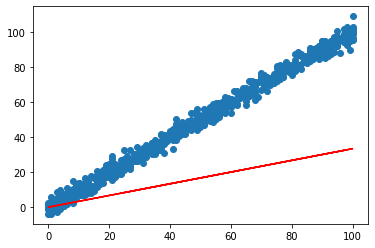

[0.008319284972241506, 0.5557035214498389]
[0.010533127355656103, 0.7036773052035968]
[0.012006667742524582, 0.802237518771347]
[0.012987118705779472, 0.8678850693676076]
[0.013639139954575337, 0.9116106382126297]


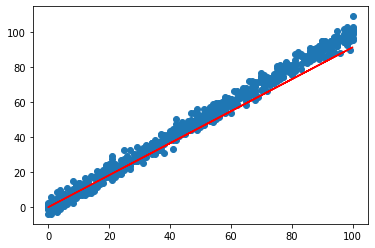

[0.014072405602559346, 0.9407347363616418]
[0.01435996576785703, 0.9601333019877012]
[0.014550476597125734, 0.9730540281668936]
[0.01467634625982874, 0.9816600904650489]
[0.014759160712111467, 0.9873923049996323]


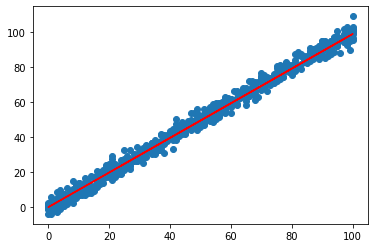

[0.01481329760968301, 0.9912103493470457]
[0.014848333409675587, 0.993753431411396]
[0.014870646657594647, 0.9954473053779638]
[0.014884485881074293, 0.9965755513231513]
[0.014892680876819895, 0.9973270520871346]


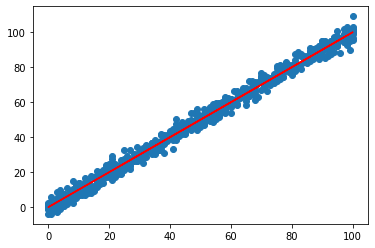

[0.014897116474137616, 0.9978276159698669]
[0.014899048092367664, 0.9981610395106341]
[0.014899311922731279, 0.9983831366740062]
[0.014898464923159426, 0.9985310832033687]
[0.01489687806398617, 0.9986296405702794]


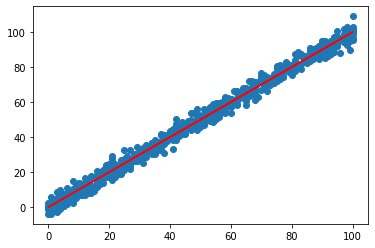

[0.014894798435666615, 0.9986953015309791]
[0.014892390616570826, 0.9987390513376072]
[0.01488976422663467, 0.9987682068850972]
[0.014886992279889688, 0.9987876417030486]
[0.014884123408445879, 0.9988006018802705]


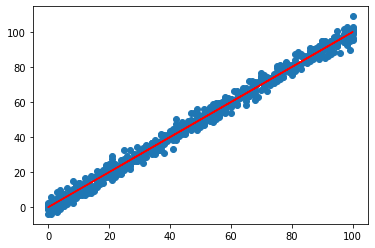

[0.014881190004462079, 0.9988092495237824]
[0.014878213643229669, 0.9988150247379799]
[0.014875208695300285, 0.9988188867263863]
[0.014872184732398644, 0.9988214743811554]
[0.014869148129917508, 0.9988232132461622]


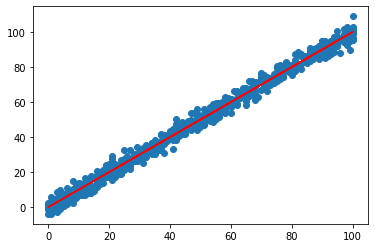

[0.01486610313428394, 0.9988243867614027]
[0.014863052573894885, 0.9988251837164145]
[0.014859998332646672, 0.9988257298573517]
[0.01485694166533658, 0.9988261089393607]
[0.014853883407740853, 0.9988263767488356]


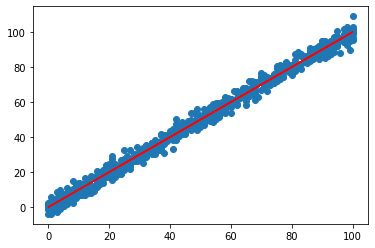

[0.01485082411654038, 0.998826570443156]
[0.014847764162520323, 0.9988267147715622]
[0.014844703792647159, 0.9988268262186631]
[0.01484164317141604, 0.998826915764285]
[0.01483858240839083, 0.9988269907217081]


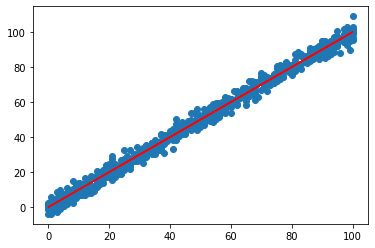

[0.014835521576547571, 0.9988270559620549]
[0.014832460724492428, 0.9988271147298107]
[0.014829399884599638, 0.9988271691860144]
[0.014826339078431913, 0.9988272207700593]
[0.014823278320350783, 0.9988272704406749]


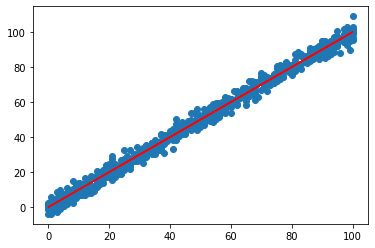

[0.014820217619921324, 0.9988273188364378]
[0.014817156983513857, 0.9988273663826819]
[0.01481409641537079, 0.9988274133627071]
[0.014811035918317202, 0.9988274599652097]
3.935746619808153


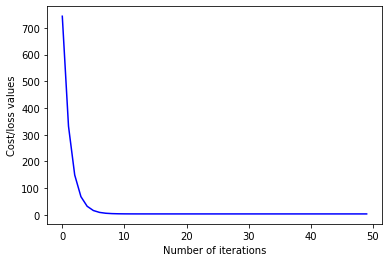

In [ ]:
alpha=0.0001
iter=50
training(x_value,y_value,alpha,iter)